New York City Taxi Trip Duration
--

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

File descriptions
train.csv - the training set (contains 1458644 trip records)
test.csv - the testing set (contains 625134 trip records)
sample_submission.csv - a sample submission file in the correct format

Data fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

EDA
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# home
sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

# SDacademy

#sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
#test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
#train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

In [2]:
df_sample_submission=pd.DataFrame(sample_submission)
df_test=pd.DataFrame(test)
df_train=pd.DataFrame(train)

In [3]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [5]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [6]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [10]:
# df_train 시간별로 라벨 생성
df_train['time_pickup']=df_train['pickup_datetime'].dt.strftime('%m%d%H%M%S')
df_train['time_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m%d%H%M%S')

df_train['month_pickup']=df_train['pickup_datetime'].dt.strftime('%m')
df_train['month_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m')

df_train['date_pickup']=df_train['pickup_datetime'].dt.strftime('%d')
df_train['date_dropoff']=df_train['dropoff_datetime'].dt.strftime('%d')

df_train['hour_pickup']=df_train['pickup_datetime'].dt.strftime('%H')
df_train['hour_dropoff']=df_train['dropoff_datetime'].dt.strftime('%H')

df_train['day_pickup']=df_train['pickup_datetime'].dt.strftime('%A')
df_train['day_dropoff']=df_train['dropoff_datetime'].dt.strftime('%A')

df_train.reset_index(drop=True, inplace=True)

In [11]:
# df_test 시간별로 라벨 생성
df_test['time_pickup']=df_test['pickup_datetime'].dt.strftime('%m%d%H%M%S')

df_test['month_pickup']=df_test['pickup_datetime'].dt.strftime('%m')

df_test['date_pickup']=df_test['pickup_datetime'].dt.strftime('%d')

df_test['hour_pickup']=df_test['pickup_datetime'].dt.strftime('%H')

df_test['day_pickup']=df_test['pickup_datetime'].dt.strftime('%A')

df_test.reset_index(drop=True, inplace=True)

In [12]:
# 만든 날짜 및 시간별 데이터 정수로 변환
df_train['time_pickup']=pd.Series(df_train['time_pickup'], dtype=int)
df_train['time_dropoff']=pd.Series(df_train['time_dropoff'], dtype=int)

df_train['month_pickup']=pd.Series(df_train['month_pickup'], dtype=int)
df_train['month_dropoff']=pd.Series(df_train['month_dropoff'], dtype=int)

df_train['date_pickup']=pd.Series(df_train['date_pickup'], dtype=int)
df_train['date_dropoff']=pd.Series(df_train['date_dropoff'], dtype=int)

df_train['hour_pickup']=pd.Series(df_train['hour_pickup'], dtype=int)
df_train['hour_dropoff']=pd.Series(df_train['hour_dropoff'], dtype=int)

df_test['time_pickup']=pd.Series(df_test['time_pickup'], dtype=int)
df_test['month_pickup']=pd.Series(df_test['month_pickup'], dtype=int)
df_test['date_pickup']=pd.Series(df_test['date_pickup'], dtype=int)
df_test['hour_pickup']=pd.Series(df_test['hour_pickup'], dtype=int)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  time_pickup         1458644 non-null  int32         
 12  time_dropoff        1458644 non-null  int32         
 13  month_pickup

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   time_pickup         625134 non-null  int32         
 10  month_pickup        625134 non-null  int32         
 11  date_pickup         625134 non-null  int32         
 12  hour_pickup         625134 non-null  int32         
 13  day_pickup          625134 no

In [15]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             625134 non-null  object
 1   trip_duration  625134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [16]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
dtype: int64

In [17]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
month_pickup          0
date_pickup           0
hour_pickup           0
day_pickup            0
dtype: int64

In [18]:
df_sample_submission.isna().sum()

id               0
trip_duration    0
dtype: int64

날짜별, 시간대별 승객 수 보기(택시 기사 본인 제외)
--

1월부터 6월까지 달 별 탑승 승객 수 
- passenger_count >= 2 

In [19]:
solo=df_train[df_train.passenger_count==1].index
df_p=df_train.drop(solo)
df_p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,130220140,130220903,1,1,30,30,22,22,Saturday,Saturday
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,617223459,617224040,6,6,17,17,22,22,Friday,Friday
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,...,515111611,515113459,5,5,15,15,11,11,Sunday,Sunday
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,...,219095246,219101120,2,2,19,19,9,10,Friday,Friday
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,...,510192738,510194440,5,5,10,10,19,19,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,...,306110448,306111745,3,3,6,6,11,11,Sunday,Sunday
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,...,317191016,317192635,3,3,17,17,19,19,Thursday,Thursday
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,...,403135125,403140737,4,4,3,3,13,14,Sunday,Sunday
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,...,202003939,202004633,2,2,2,2,0,0,Tuesday,Tuesday


In [20]:
df_p.groupby('month_pickup')['passenger_count'].sum().reset_index()

,month_pickup,passenger_count
0,1,221990
1,2,226055
2,3,243715
3,4,242059
4,5,237695
5,6,222902


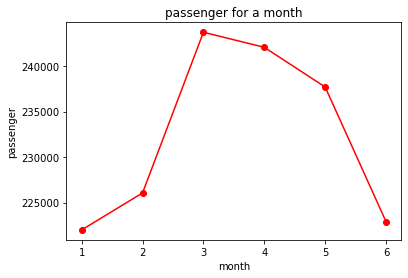

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_p['month_pickup'].unique()
month_passenger=df_p.groupby('month_pickup')['passenger_count'].sum()
month_passenger

labels=['1','2','3','4','5','6']

fig, ax=plt.subplots()
plt.plot(labels, month_passenger, marker="o", color='r')
plt.xlabel("month")
plt.ylabel("passenger")
plt.title("passenger for a month")
plt.show()

1일 부터 31일까지 일 별 탑승 승객 수

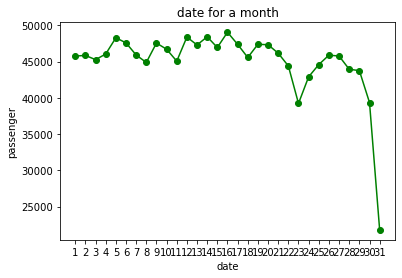

In [22]:
df_p['date_pickup'].unique()
date_passenger=df_p.groupby('date_pickup')['passenger_count'].sum()
date_passenger

labels=['1','2','3','4','5','6','7','8','9','10','11','12','13',
'14','15','16','17','18','19','20','21','22','23','24','25','26',
'27','28','29','30','31']

fig, ax=plt.subplots()
plt.plot(labels, date_passenger, marker="o", color='g')
plt.xlabel("date")
plt.ylabel("passenger")
plt.title("date for a month")
plt.show()

시간대별, 요일 별 승객 수 보기

[Text(0, 0.5, 'passenger'), Text(0.5, 1.0, 'day')]

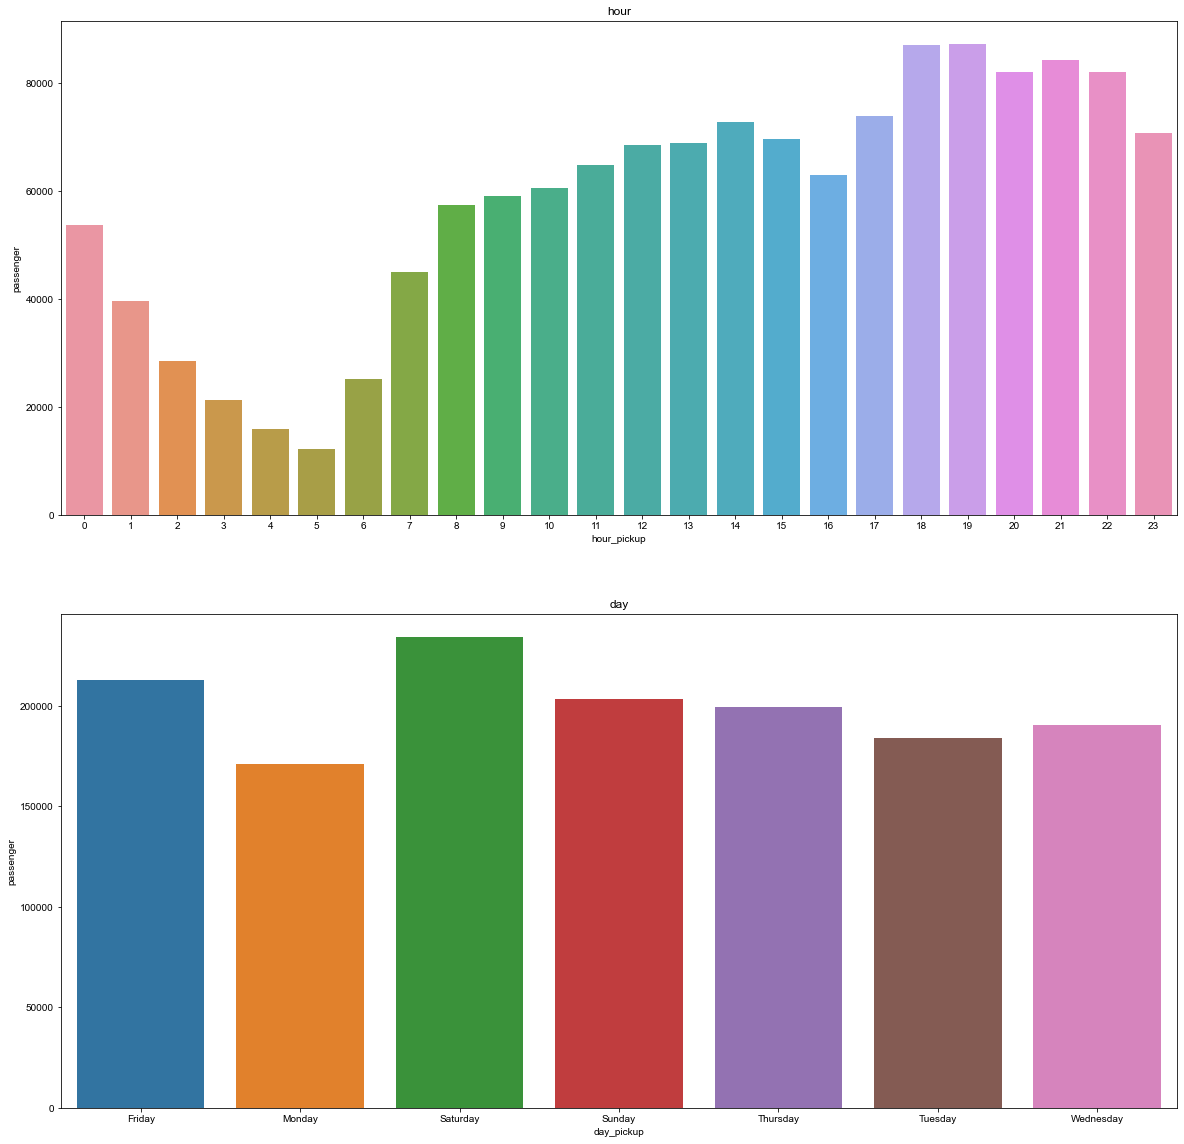

In [23]:
import seaborn as sns
hour_passenger=df_p.groupby('hour_pickup')['passenger_count'].sum().reset_index()
day_passenger=df_p.groupby('day_pickup')['passenger_count'].sum().reset_index()

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

sns.barplot(data=hour_passenger, x="hour_pickup", y="passenger_count", ax=ax1)
'\n'
sns.barplot(data=day_passenger, x="day_pickup", y="passenger_count", ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='passenger', title ="hour")
ax2.set(ylabel='passenger', title ="day")

- make elapsed_time column

In [24]:
i=0
elapsed_time=[]

for i in range(0,1458644):
    e_time=df_train.dropoff_datetime[i]-df_train.pickup_datetime[i]
    elapsed_time.append(e_time)
    i+=1

In [25]:
elapsed_time=pd.Series(elapsed_time)
df_train['elapsed_time']=elapsed_time
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,314173230,3,3,14,14,17,17,Monday,Monday,0 days 00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,612005438,6,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,119121048,1,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,406193940,4,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,326133810,3,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,408134402,4,4,8,8,13,13,Friday,Friday,0 days 00:12:58
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,110074610,1,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,422071025,4,4,22,22,6,7,Friday,Friday,0 days 00:12:44
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,105160239,1,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13


- make elapsed_time_h column
- elpased_time_h == trip_duration * 3600

In [26]:
i=0
elapsed_time_h=[]

for i in range(0,1458644):
    e_time_h=round((df_train.elapsed_time.iloc[i].seconds/3600), 5)
    elapsed_time_h.append(e_time_h)

In [27]:
elapsed_time_h=pd.Series(elapsed_time_h)
df_train['elapsed_time_h']=elapsed_time_h

- make distance column

In [28]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [29]:
df_train['distance']=df_train.id
df_test['distance']=df_test.id

In [30]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [31]:
d=pd.Series(d)
df_train['distance']=d

In [32]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [33]:
d=pd.Series(d)
df_test['distance']=d

- store_and_fwd_flag encoding

In [34]:
i=0
store_and_fwd_flag=[]

for i in range(0,1458644):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [35]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_train['store_and_fwd_flag']=store_and_fwd_flag

In [36]:
i=0
store_and_fwd_flag=[]

for i in range(0,625134):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [37]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_test['store_and_fwd_flag']=store_and_fwd_flag

store_and_fwd_flag ratio
--

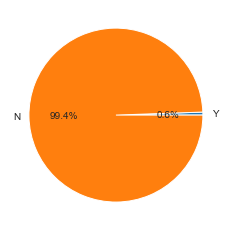

In [38]:
Y=len(df_train[df_train.store_and_fwd_flag==1].value_counts())
N=len(df_train[df_train.store_and_fwd_flag==0].value_counts())
store_and_fwd_flag=len(df_train.store_and_fwd_flag)

store_and_fwd_flag_ratio=[Y, N]
labels=['Y','N']

plt.pie(store_and_fwd_flag_ratio, labels=labels, autopct='%.1f%%')
plt.show()

- This flag indicates whether the trip record was held in vehicle memory before 

- sending to the vendor because the vehicle did not have a connection to the server

- Y=store and forward; N=not a store and forward trip


- store and forward 방식: 패킷교환에서 채택한 축적 교환(Store-and-Forward) 방식은 일단 들어오는 데이터를 버퍼에 담아두고(Store) CRC 등 에러검출과 같은 처리를 완전히 한 이후에 전달(Forward)하는 교환 기법이다.


vendor_id
--

- a code indicating the provider associated with the trip record

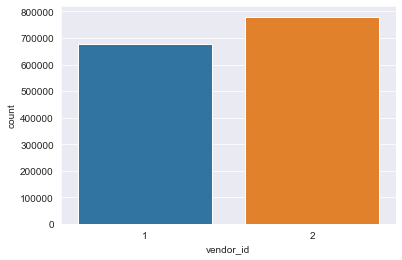

In [39]:
sns.countplot(df_train.vendor_id)
plt.show()

passenger_count
--

- passenger_count - the number of passengers in the vehicle (driver entered value)

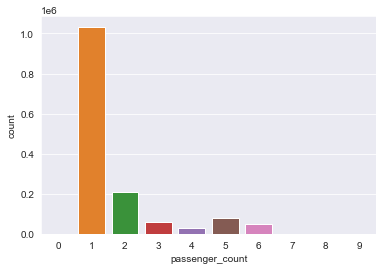

In [40]:
sns.countplot(df_train.passenger_count)
plt.show()

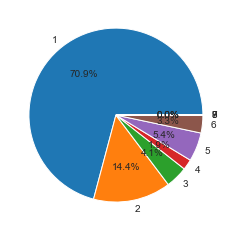

In [41]:
p1=len(df_train[df_train.passenger_count==1].value_counts())
p2=len(df_train[df_train.passenger_count==2].value_counts())
p3=len(df_train[df_train.passenger_count==3].value_counts())
p4=len(df_train[df_train.passenger_count==4].value_counts())
p5=len(df_train[df_train.passenger_count==5].value_counts())
p6=len(df_train[df_train.passenger_count==6].value_counts())
p7=len(df_train[df_train.passenger_count==7].value_counts())
p8=len(df_train[df_train.passenger_count==8].value_counts())
p9=len(df_train[df_train.passenger_count==9].value_counts())

pc=len(df_train.passenger_count)

passenger_count_ratio=[p1, p2, p3, p4, p5, p6, p7, p8, p9]
labels=['1','2','3','4','5','6','7','8','9']

plt.pie(passenger_count_ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [42]:
def bar_chart2(feature):
    no_passenger = df_train[df_train['passenger_count'] ==1][feature].value_counts() 
    passenger= df_train[df_train['passenger_count'] !=1][feature].value_counts() 
    df = pd.DataFrame([no_passenger,passenger]) 
    df.index = ['NO','YES'] 
    df.plot(kind = 'bar',stacked = True, figsize = (10,5)) 

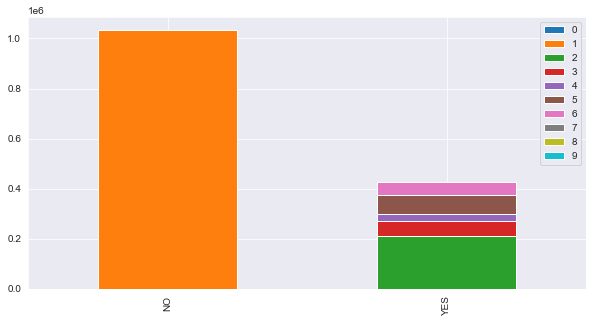

In [43]:
bar_chart2('passenger_count')

위도와 경도 분석하기
--

1.  train

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

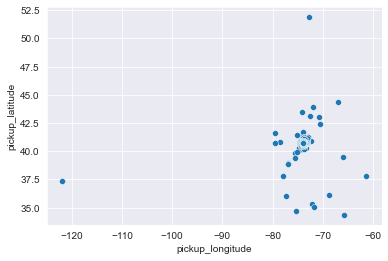

In [44]:
pickup=df_train.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

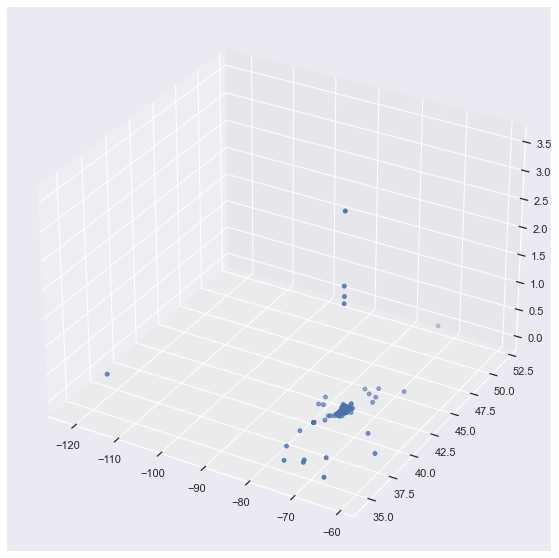

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

p_longitude=np.array(df_train.pickup_longitude)
p_latitude=np.array(df_train.pickup_latitude)
time=np.array(df_train.trip_duration)

xs=p_longitude
ys=p_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

- x: pickup_longitude
- y: pickup_latitude
- z: trip_duration

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

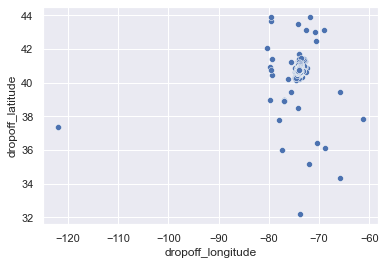

In [46]:
dropoff=df_train.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

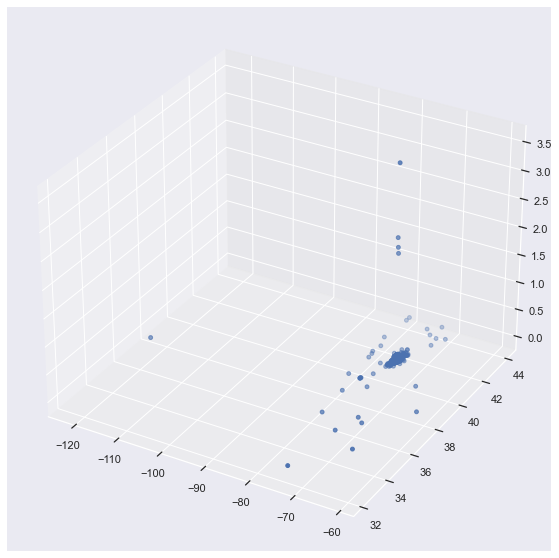

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

d_longitude=np.array(df_train.dropoff_longitude)
d_latitude=np.array(df_train.dropoff_latitude)
time=np.array(df_train.trip_duration)

xs=d_longitude
ys=d_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

2. test

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

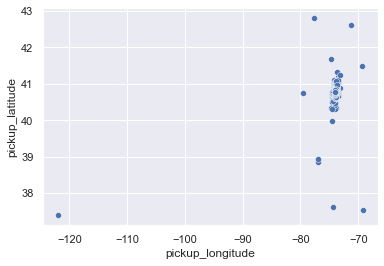

In [48]:
pickup=df_test.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

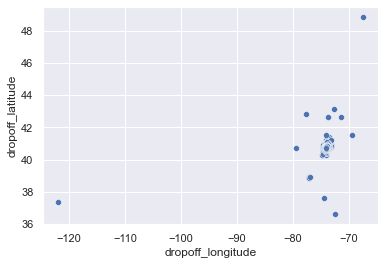

In [49]:
dropoff=df_test.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

Folium으로 지도 보기

1. train

In [50]:
pickup=df_train[['pickup_latitude','pickup_longitude']]
dropoff=df_train[['dropoff_latitude','dropoff_longitude']]

In [51]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [52]:
df_train.pickup_latitude.mean()

40.750920908391734

In [53]:
df_train.pickup_longitude.mean()

-73.97348630489282

In [54]:
len(pickup_list)

1458644

In [56]:
!pip install folium

In [57]:
import folium

lon, lat= -73.97348630489282, 40.750920908391734
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(1458644, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

2. test

In [58]:
pickup=df_test[['pickup_latitude','pickup_longitude']]
dropoff=df_test[['dropoff_latitude','dropoff_longitude']]

In [59]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [60]:
df_test.pickup_latitude.mean()

40.75092741194779

In [61]:
df_test.pickup_longitude.mean()

-73.97361432244571

In [62]:
len(pickup_list)

625134

In [63]:
import folium

lon, lat= -73.97361432244571, 40.75092741194779
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(625134, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

K-means를 이용하여 군집화하기

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_train['pickup_clusters']=pickup_clusters

In [65]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_train['dropoff_clusters']=dropoff_clusters

In [66]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_test[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_test[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_test['pickup_clusters']=pickup_clusters

In [67]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_test[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_test[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_test['dropoff_clusters']=dropoff_clusters

1. train
- pick up

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

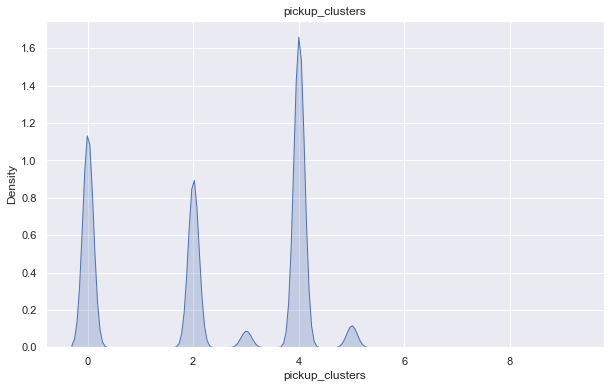

In [68]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=df_train['pickup_clusters'], shade=True)

- dropoff

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

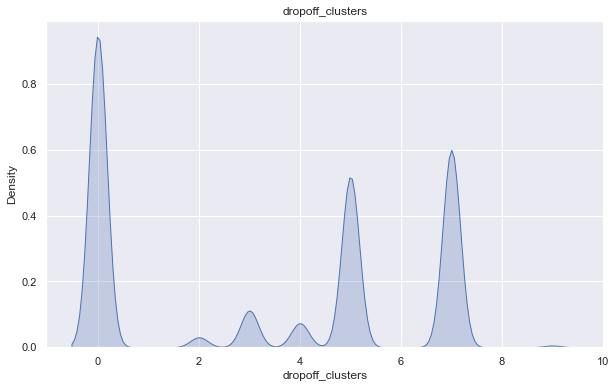

In [73]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=df_train['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

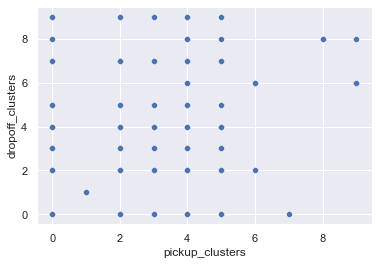

In [74]:
tn_pickup_dropoff=df_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])

2. test
-  pickup

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

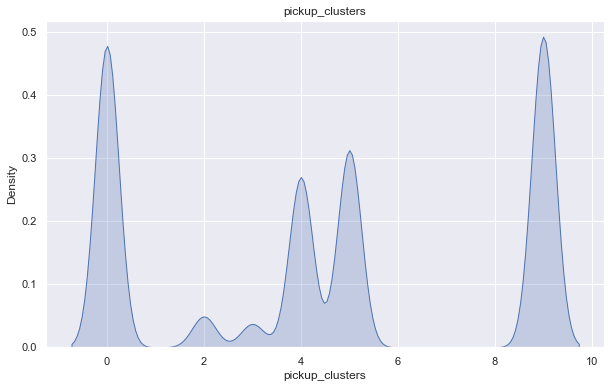

In [75]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=df_test['pickup_clusters'], shade=True)

- dropoff

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

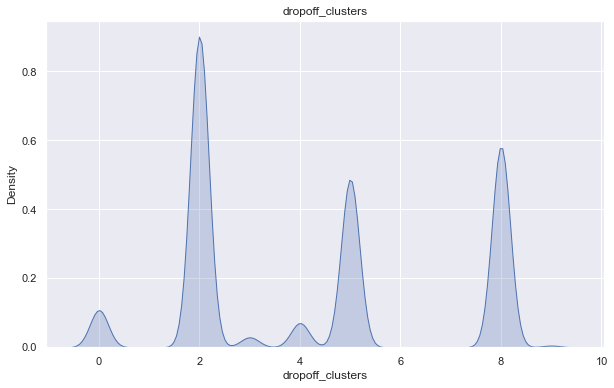

In [76]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=df_test['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

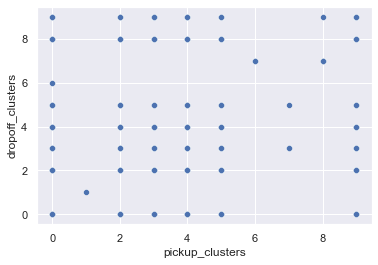

In [77]:
te_pickup_dropoff=df_test.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(te_pickup_dropoff['pickup_clusters'], te_pickup_dropoff['dropoff_clusters'])

각 군집별로 pickup, dropoff 구역별로 1과 0으로 설정하기

In [78]:
tn_pickup_clusters=np.array(df_train.pickup_clusters)
tn_dropoff_clusters=np.array(df_train.dropoff_clusters)
te_pickup_clusters=np.array(df_test.pickup_clusters)
te_dropoff_clusters=np.array(df_test.dropoff_clusters)

In [79]:
i=0
pc_0=[]
pc_1=[]
pc_2=[]
pc_3=[]
pc_4=[]
pc_5=[]
pc_6=[]
pc_7=[]
pc_8=[]
pc_9=[]

for i in range(0,1458644):
    if tn_pickup_clusters[i]==0:
        pc_0.append(1)
    else:
        pc_0.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==1:
        pc_1.append(1)
    else:
        pc_1.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==2:
        pc_2.append(1)
    else:
        pc_2.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==3:
        pc_3.append(1)
    else:
        pc_3.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==4:
        pc_4.append(1)
    else:
        pc_4.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==5:
        pc_5.append(1)
    else:
        pc_5.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==6:
        pc_6.append(1)
    else:
        pc_6.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==7:
        pc_7.append(1)
    else:
        pc_7.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==8:
        pc_8.append(1)
    else:
        pc_8.append(0)
        i+=1

        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==9:
        pc_9.append(1)
    else:
        pc_9.append(0)
        i+=1
        
    
pc_0=pd.Series(pc_0)
df_train['pc_0']=pc_0

pc_1=pd.Series(pc_1)
df_train['pc_1']=pc_1

pc_2=pd.Series(pc_2)
df_train['pc_2']=pc_2

pc_3=pd.Series(pc_3)
df_train['pc_3']=pc_3

pc_4=pd.Series(pc_4)
df_train['pc_4']=pc_4

pc_5=pd.Series(pc_5)
df_train['pc_5']=pc_5

pc_6=pd.Series(pc_6)
df_train['pc_6']=pc_6

pc_7=pd.Series(pc_7)
df_train['pc_7']=pc_7

pc_8=pd.Series(pc_8)
df_train['pc_8']=pc_8

pc_9=pd.Series(pc_9)
df_train['pc_9']=pc_9

In [80]:
i=0
dc_0=[]
dc_1=[]
dc_2=[]
dc_3=[]
dc_4=[]
dc_5=[]
dc_6=[]
dc_7=[]
dc_8=[]
dc_9=[]

for i in range(0,1458644):
    if tn_dropoff_clusters[i]==0:
        dc_0.append(1)
    else:
        dc_0.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==1:
        dc_1.append(1)
    else:
        dc_1.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==2:
        dc_2.append(1)
    else:
        dc_2.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==3:
        dc_3.append(1)
    else:
        dc_3.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==4:
        dc_4.append(1)
    else:
        dc_4.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==5:
        dc_5.append(1)
    else:
        dc_5.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==6:
        dc_6.append(1)
    else:
        dc_6.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==7:
        dc_7.append(1)
    else:
        dc_7.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==8:
        dc_8.append(1)
    else:
        dc_8.append(0)
        i+=1

        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==9:
        dc_9.append(1)
    else:
        dc_9.append(0)
        i+=1
        
        
        
dc_0=pd.Series(dc_0)
df_train['dc_0']=dc_0

dc_1=pd.Series(dc_1)
df_train['dc_1']=dc_1

dc_2=pd.Series(dc_2)
df_train['dc_2']=dc_2

dc_3=pd.Series(dc_3)
df_train['dc_3']=dc_3

dc_4=pd.Series(dc_4)
df_train['dc_4']=dc_4

dc_5=pd.Series(dc_5)
df_train['dc_5']=dc_5

dc_6=pd.Series(dc_6)
df_train['dc_6']=dc_6

dc_7=pd.Series(dc_7)
df_train['dc_7']=dc_7

dc_8=pd.Series(dc_8)
df_train['dc_8']=dc_8

dc_9=pd.Series(dc_9)
df_train['dc_9']=dc_9
       

In [81]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
elapsed_time          0
elapsed_time_h        0
distance              0
pickup_clusters       0
dropoff_clusters      0
pc_0                  0
pc_1                  0
pc_2                  0
pc_3                  0
pc_4                  0
pc_5                  0
pc_6                  0
pc_7                  0
pc_8                  0
pc_9                  0
dc_0                  0
dc_1                  0
dc_2                  0
dc_3                  0
dc_4                  0
dc_5            

In [82]:
i=0
pc_0=[]
pc_1=[]
pc_2=[]
pc_3=[]
pc_4=[]
pc_5=[]
pc_6=[]
pc_7=[]
pc_8=[]
pc_9=[]

for i in range(0,625134):
    if te_pickup_clusters[i]==0:
        pc_0.append(1)
    else:
        pc_0.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==1:
        pc_1.append(1)
    else:
        pc_1.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==2:
        pc_2.append(1)
    else:
        pc_2.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==3:
        pc_3.append(1)
    else:
        pc_3.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==4:
        pc_4.append(1)
    else:
        pc_4.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==5:
        pc_5.append(1)
    else:
        pc_5.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==6:
        pc_6.append(1)
    else:
        pc_6.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==7:
        pc_7.append(1)
    else:
        pc_7.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==8:
        pc_8.append(1)
    else:
        pc_8.append(0)
        i+=1

        
for i in range(0,625134):
    if te_pickup_clusters[i]==9:
        pc_9.append(1)
    else:
        pc_9.append(0)
        i+=1
        
    
pc_0=pd.Series(pc_0)
df_test['pc_0']=pc_0

pc_1=pd.Series(pc_1)
df_test['pc_1']=pc_1

pc_2=pd.Series(pc_2)
df_test['pc_2']=pc_2

pc_3=pd.Series(pc_3)
df_test['pc_3']=pc_3

pc_4=pd.Series(pc_4)
df_test['pc_4']=pc_4

pc_5=pd.Series(pc_5)
df_test['pc_5']=pc_5

pc_6=pd.Series(pc_6)
df_test['pc_6']=pc_6

pc_7=pd.Series(pc_7)
df_test['pc_7']=pc_7

pc_8=pd.Series(pc_8)
df_test['pc_8']=pc_8

pc_9=pd.Series(pc_9)
df_test['pc_9']=pc_9

In [83]:
i=0
dc_0=[]
dc_1=[]
dc_2=[]
dc_3=[]
dc_4=[]
dc_5=[]
dc_6=[]
dc_7=[]
dc_8=[]
dc_9=[]

for i in range(0,625134):
    if te_dropoff_clusters[i]==0:
        dc_0.append(1)
    else:
        dc_0.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==1:
        dc_1.append(1)
    else:
        dc_1.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==2:
        dc_2.append(1)
    else:
        dc_2.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==3:
        dc_3.append(1)
    else:
        dc_3.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==4:
        dc_4.append(1)
    else:
        dc_4.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==5:
        dc_5.append(1)
    else:
        dc_5.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==6:
        dc_6.append(1)
    else:
        dc_6.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==7:
        dc_7.append(1)
    else:
        dc_7.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==8:
        dc_8.append(1)
    else:
        dc_8.append(0)
        i+=1

        
for i in range(0,625134):
    if te_dropoff_clusters[i]==9:
        dc_9.append(1)
    else:
        dc_9.append(0)
        i+=1
        
        
        
dc_0=pd.Series(dc_0)
df_test['dc_0']=dc_0

dc_1=pd.Series(dc_1)
df_test['dc_1']=dc_1

dc_2=pd.Series(dc_2)
df_test['dc_2']=dc_2

dc_3=pd.Series(dc_3)
df_test['dc_3']=dc_3

dc_4=pd.Series(dc_4)
df_test['dc_4']=dc_4

dc_5=pd.Series(dc_5)
df_test['dc_5']=dc_5

dc_6=pd.Series(dc_6)
df_test['dc_6']=dc_6

dc_7=pd.Series(dc_7)
df_test['dc_7']=dc_7

dc_8=pd.Series(dc_8)
df_test['dc_8']=dc_8

dc_9=pd.Series(dc_9)
df_test['dc_9']=dc_9
     

In [84]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
month_pickup          0
date_pickup           0
hour_pickup           0
day_pickup            0
distance              0
pickup_clusters       0
dropoff_clusters      0
pc_0                  0
pc_1                  0
pc_2                  0
pc_3                  0
pc_4                  0
pc_5                  0
pc_6                  0
pc_7                  0
pc_8                  0
pc_9                  0
dc_0                  0
dc_1                  0
dc_2                  0
dc_3                  0
dc_4                  0
dc_5                  0
dc_6                  0
dc_7                  0
dc_8                  0
dc_9                  0
dtype: int64

In [85]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,1,0,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,0,0,0,0,0,0,1,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,0,0,0,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,0,0,0,0,0,0,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,0,0,0,0,0,1,0,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,1,0,0,0,0,0,0,0,0,0


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   pickup_datetime     1458644 non-null  datetime64[ns] 
 3   dropoff_datetime    1458644 non-null  datetime64[ns] 
 4   passenger_count     1458644 non-null  int64          
 5   pickup_longitude    1458644 non-null  float64        
 6   pickup_latitude     1458644 non-null  float64        
 7   dropoff_longitude   1458644 non-null  float64        
 8   dropoff_latitude    1458644 non-null  float64        
 9   store_and_fwd_flag  1458644 non-null  int64          
 10  trip_duration       1458644 non-null  int64          
 11  time_pickup         1458644 non-null  int32          
 12  time_dropoff        1458644 non-null  int32          
 1

In [87]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,...,0,0,1,0,0,0,0,0,0,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,...,1,0,0,0,0,0,0,0,0,0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,...,0,0,0,0,0,0,0,0,1,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,...,0,0,0,0,0,0,0,0,1,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,...,0,0,0,0,0,0,0,0,1,0
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,...,0,0,0,0,0,1,0,0,0,0
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,...,0,0,0,0,1,0,0,0,0,0
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,...,0,0,0,0,1,0,0,0,0,0


In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  int64         
 9   time_pickup         625134 non-null  int32         
 10  month_pickup        625134 non-null  int32         
 11  date_pickup         625134 non-null  int32         
 12  hour_pickup         625134 non-null  int32         
 13  day_pickup          625134 no

1. train 지점별 상관관계

In [89]:
train_loc=df_train.iloc[:, 26:46]

In [90]:
tn_p_loc=df_train.iloc[:, 26:36]

In [91]:
tn_d_loc=df_train.iloc[:, 36:46]

출발 지점

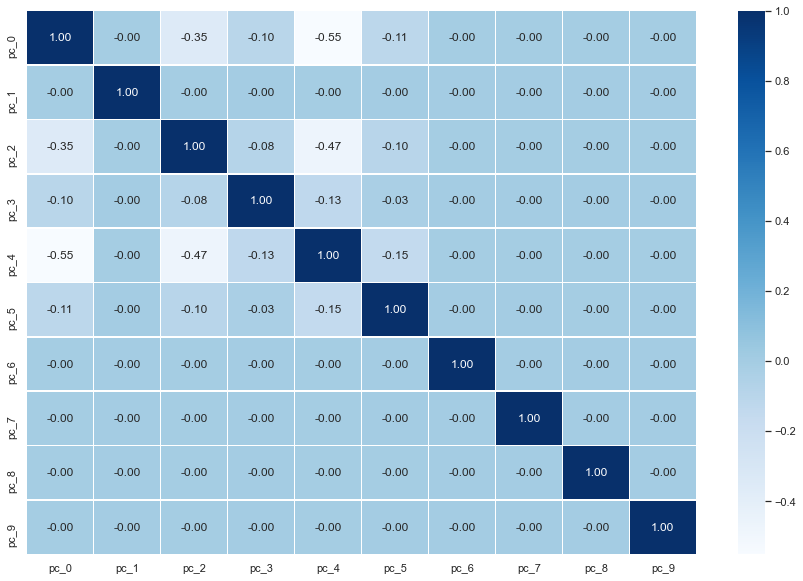

In [92]:
plt.figure(figsize=(15,10))
sns.heatmap(data=tn_p_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

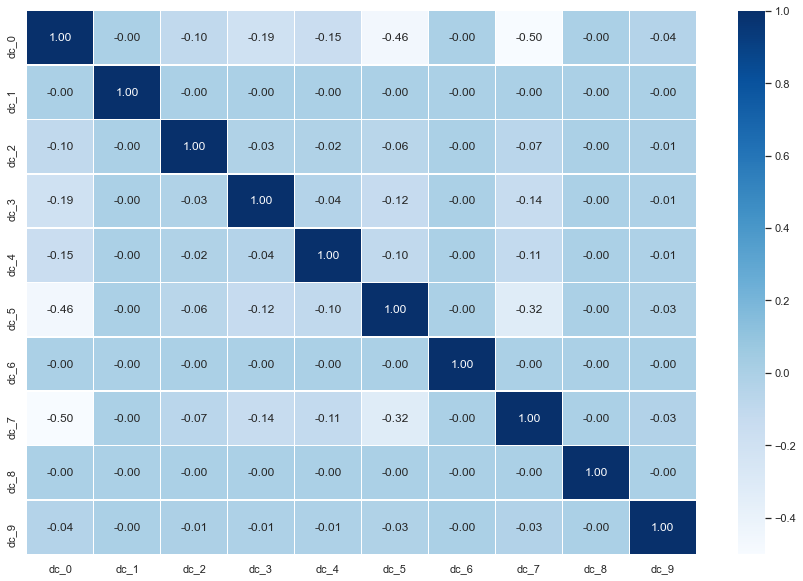

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(data=tn_d_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

지점 별 상관관계

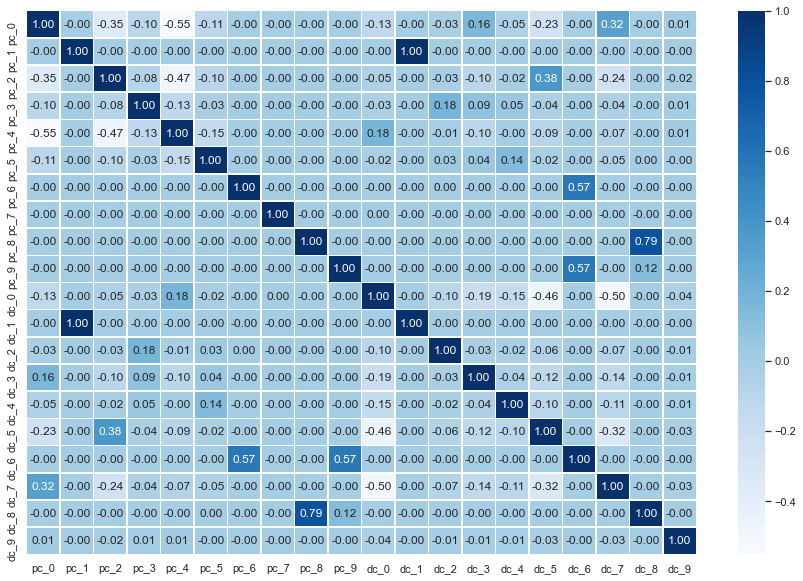

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(data=train_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

2. test 지점별 상관관계

In [95]:
test_loc=df_test.iloc[:, 12:32]

In [96]:
te_p_loc=df_test.iloc[:, 12:22]

In [97]:
te_d_loc=df_test.iloc[:, 22:32]

출발 지점

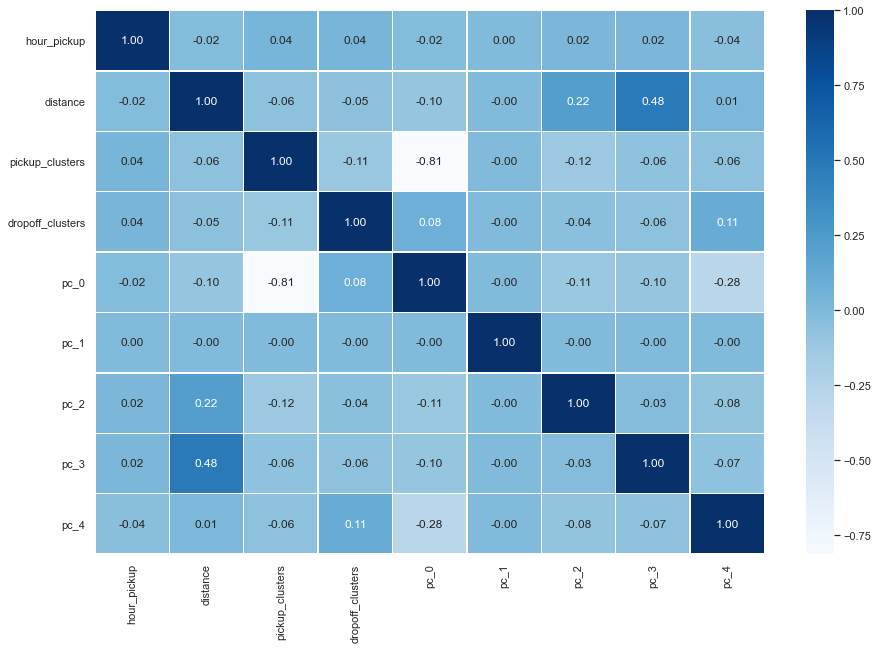

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(data=te_p_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

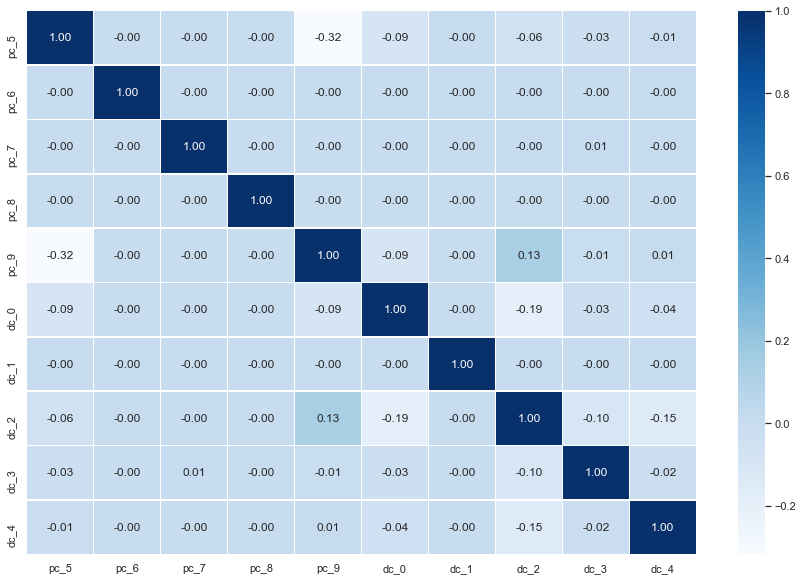

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(data=te_d_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

지점 별 상관관계

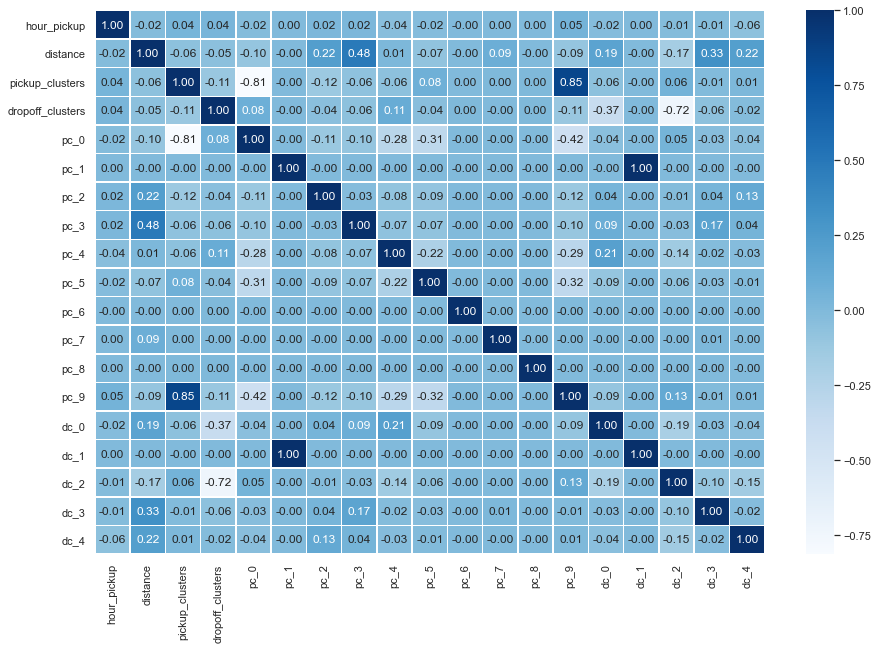

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(data=test_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

Machine learning
--

First Solution Process: Linear Regression
--

1. train data를 Linear Regression에 맞게 전처리 해준다.
2. train data를 train, test로 나눠서 적용해본다.
3. 실제 train데이터를 train, test데이터를 test로 나눈다.
4. test데이터의 예측값을 sample_submissiondml trip_duration에 적용해준다.

In [101]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time',
       'elapsed_time_h', 'distance', 'pickup_clusters', 'dropoff_clusters',
       'pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8',
       'pc_9', 'dc_0', 'dc_1', 'dc_2', 'dc_3', 'dc_4', 'dc_5', 'dc_6', 'dc_7',
       'dc_8', 'dc_9'],
      dtype='object')

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   pickup_datetime     1458644 non-null  datetime64[ns] 
 3   dropoff_datetime    1458644 non-null  datetime64[ns] 
 4   passenger_count     1458644 non-null  int64          
 5   pickup_longitude    1458644 non-null  float64        
 6   pickup_latitude     1458644 non-null  float64        
 7   dropoff_longitude   1458644 non-null  float64        
 8   dropoff_latitude    1458644 non-null  float64        
 9   store_and_fwd_flag  1458644 non-null  int64          
 10  trip_duration       1458644 non-null  int64          
 11  time_pickup         1458644 non-null  int32          
 12  time_dropoff        1458644 non-null  int32          
 1

In [103]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time',
       'elapsed_time_h', 'distance', 'pickup_clusters', 'dropoff_clusters',
       'pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8',
       'pc_9', 'dc_0', 'dc_1', 'dc_2', 'dc_3', 'dc_4', 'dc_5', 'dc_6', 'dc_7',
       'dc_8', 'dc_9'],
      dtype='object')

In [104]:
lr_train=df_train.drop(['pickup_datetime','dropoff_datetime','elapsed_time','day_dropoff',
                       'pc_0', 'pc_1', 'pc_2','pickup_clusters','dropoff_clusters',                        
                       'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8','pc_9', 'dc_0', 
                     'dc_1', 'dc_2', 'dc_3', 'dc_4', 'dc_5', 'dc_6', 'dc_7','dc_8', 'dc_9',
                       'month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff','day_pickup'], axis=1)

lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,distance
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.49852
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,1.80551
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,0.59000,6.38510
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.48550
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.18859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.22508
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,0.18194,6.04984
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,0.21222,7.82461
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.09256


In [105]:
lr_test=df_test.drop(['pickup_datetime','pickup_clusters','dropoff_clusters',
       'pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8',
       'pc_9', 'dc_0', 'dc_1', 'dc_2', 'dc_3', 'dc_4', 'dc_5', 'dc_6', 'dc_7',
       'dc_8', 'dc_9','month_pickup','date_pickup','hour_pickup','day_pickup'], axis=1)

lr_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,2.74643
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,2.75924
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,1.30616
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,5.26909
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,0.96084
...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,0.96744
625130,id3700764,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,6.19634
625131,id2568735,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,8.15372
625132,id1384355,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,20.38075


id label encoding

In [106]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_train_encoded_id=le.fit_transform(lr_train['id'])
np_id=lr_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_train['id']=id_1

In [107]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_test_encoded_id=le.fit_transform(lr_test['id'])
np_id=lr_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_test['id']=id_1

IQR을 이용하여 이상치 제거

In [108]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [109]:
lr_train=remove_outlier_test(lr_train, 'elapsed_time_h' )
lr_train=remove_outlier_test(lr_train, 'distance' )
lr_train

74324
(1384320, 13)
107658
(1276662, 13)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,0.12306,1.09894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,0.11500,2.31745
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.22508
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,0.18194,6.04984
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.09256


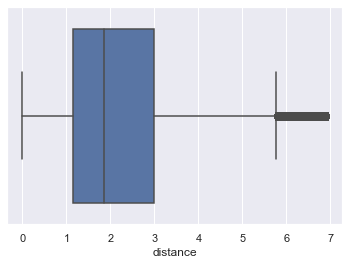

In [110]:
sns.boxplot(x = "distance", orient = "v", data = lr_train)
sns.set_style("darkgrid")
plt.show()

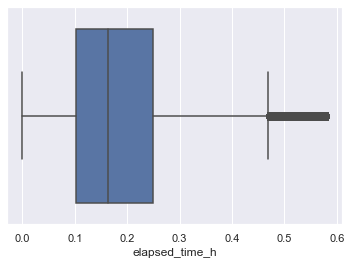

In [111]:
sns.boxplot(x = "elapsed_time_h", orient = "v", data = lr_train)
sns.set_style("darkgrid")
plt.show()

평균 속도 칼럼 만들어 주기

In [112]:
np_elap=np.array([lr_train.elapsed_time_h])
np_dis=np.array([lr_train.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
lr_train['km_h']=np_speed
lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,0.12306,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,0.11500,2.31745,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.22508,5.668780
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,0.18194,6.04984,33.251841
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.09256,10.544928


In [113]:
lr_train=remove_outlier_test(lr_train, 'km_h' )
lr_train

39908
(1236754, 14)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,0.12306,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,417190056,0.21111,3.53756,16.756951
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,0.11500,2.31745,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.22508,5.668780
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.09256,10.544928


거리, 속력, 시간 시각화

<AxesSubplot:title={'center':'distance'}, xlabel='distance', ylabel='Density'>

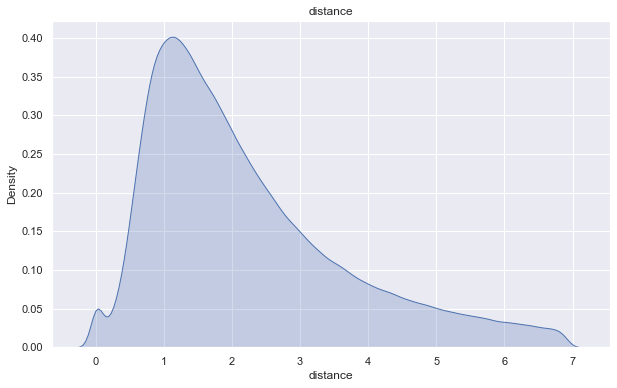

In [114]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("distance")
sns.kdeplot(data=lr_train['distance'], shade=True)

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

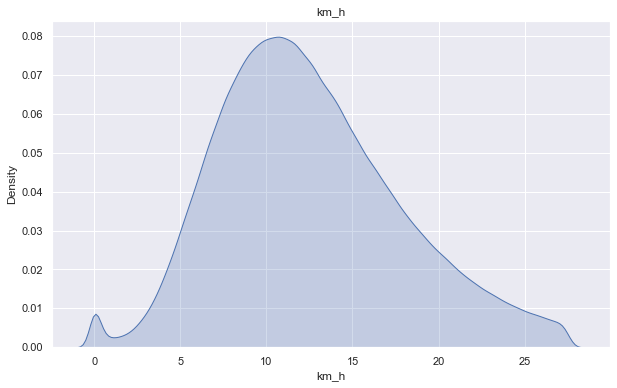

In [115]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=lr_train['km_h'], shade=True)

<AxesSubplot:title={'center':'elapsed_time_h'}, xlabel='elapsed_time_h', ylabel='Density'>

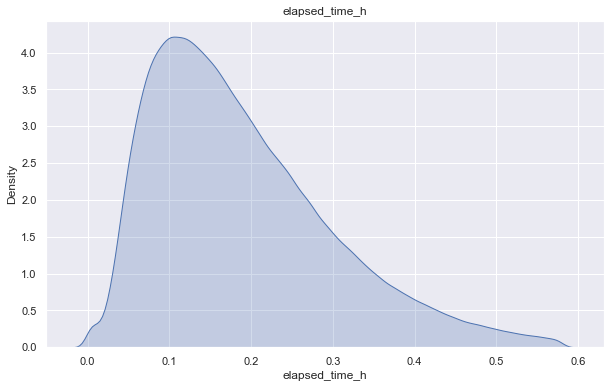

In [116]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("elapsed_time_h")
sns.kdeplot(data=lr_train['elapsed_time_h'], shade=True)

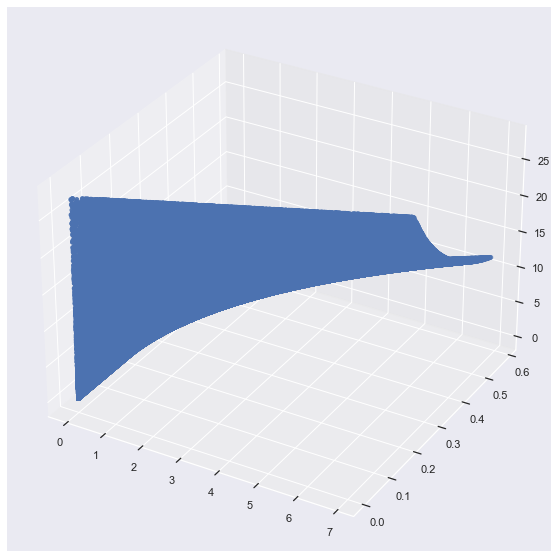

In [117]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

time=np.array(lr_train.elapsed_time_h)
distance=np.array(lr_train.distance)
speed=np.array(lr_train.km_h)

xs=distance
ys=time
zs=speed

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)


- x: distance(km)
- y: time(elapsed_time_h)
- z: speed(km/h)

모든 변수를 포함한 Linear Regression Model 만들기
--

train 데이터를 train, test로 나누어서 학습시켜보기

In [118]:
lr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236754 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1236754 non-null  int64  
 1   vendor_id           1236754 non-null  int64  
 2   passenger_count     1236754 non-null  int64  
 3   pickup_longitude    1236754 non-null  float64
 4   pickup_latitude     1236754 non-null  float64
 5   dropoff_longitude   1236754 non-null  float64
 6   dropoff_latitude    1236754 non-null  float64
 7   store_and_fwd_flag  1236754 non-null  int64  
 8   trip_duration       1236754 non-null  int64  
 9   time_pickup         1236754 non-null  int32  
 10  time_dropoff        1236754 non-null  int32  
 11  elapsed_time_h      1236754 non-null  float64
 12  distance            1236754 non-null  float64
 13  km_h                1236754 non-null  float64
dtypes: float64(7), int32(2), int64(5)
memory usage: 132.1 MB


In [119]:
X=lr_train.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [120]:
y=lr_train.trip_duration

In [121]:
X

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,130220140,1.09894
...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,417184816,3.53756
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,202003939,2.31745
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,1.22508
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1.09256


In [122]:
y

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236754, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 10)
(247351, 10)
(989403,)
(247351,)


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

- lr_train의 train 점수보기

In [125]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 280.3539517546647 입니다.
r2 는 0.5 입니다.
train 스코어는 0.5041661025411305 입니다.


- lr_train의 test 점수보기

In [126]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 280.62633006890485 입니다.
r2 점수는 0.5 입니다.
test 스코어는 0.5029663906114221 입니다.


In [127]:
y_test

858940     869
328458     500
892008     809
966825    2054
946665    1011
          ... 
455783     559
842642     418
298495    1468
389773    1227
78346      444
Name: trip_duration, Length: 247351, dtype: int64

In [128]:
y_test_pred.reshape(-1,1)

array([[ 703.65105094],
       [ 593.44512852],
       [ 882.19611548],
       ...,
       [1181.02039449],
       [ 827.07933704],
       [ 567.51704833]])

In [129]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                 1.257e+05
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        23:52:43   Log-Likelihood:            -8.7255e+06
No. Observations:             1236754   AIC:                         1.745e+07
Df Residuals:                 1236743   BIC:                         1.745e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.079e+04    559.391     19.296      0.000    9697.753    1.19e+04
id                  1.141e-06   5.99e-07      1.906      0.057   -3.25e-08    2.32e-06
vendor_id              0.6571      0.529      1.241      0.215      -0.381       1.695
passenger_count        2.0434      0.201     10.178      0.000       1.650       2.437
pickup_longitude     443.0554     16.209     27.333      0.000     411.285     474.825
pickup_latitude      478.6489     16.014     29.890      0.000     447.262     510.036
dropoff_longitude   -520.0027     16.082    -32.334      0.000    -551.523    -488.483
dropoff_latitude    -878.0728     14.858    -59.098      0.000    -907.194    -848.952
store_and_fwd_flag    16.8898      3.662      4.613      0.000       9.713      24.067
time_pickup         1.023e-07    1.5e-09     68.193      0.000    9.94e-08    1.05e-07
distance             193.2826      0.176   1098.929      0.000     192.938     193.627
==============================================================================
Omnibus:                   279716.743   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           666547.092
Skew:                           1.267   Prob(JB):                         0.00
Kurtosis:                       5.553   Cond. No.                     8.94e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 78751.137 , RMSE : 280.626
Variance score : 0.503


In [131]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

pickup_latitude       480.9
pickup_longitude      418.7
distance              193.1
store_and_fwd_flag     14.8
passenger_count         1.9
vendor_id               0.5
time_pickup             0.0
id                      0.0
dropoff_longitude    -534.6
dropoff_latitude     -871.3
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

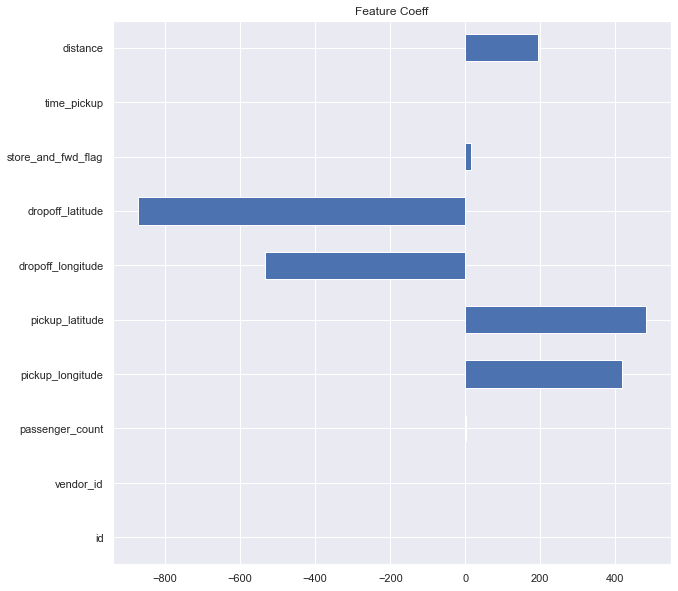

In [132]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test score: {:.3f}'.format(ridge.score(X_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test score: {:.3f}'.format(lasso.score(X_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test score: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.504
lr test score: 0.503
lr mse: 78751.137
lr rmse: 280.626


ridge train score: 0.504
ridge test score: 0.503
ridge mse: 78751.218
ridge rmse: 280.626


lasso train score: 0.501
lasso test score: 0.500
lasso mse: 79219.845
lasso rmse: 281.460


elasticnet train score: 0.482
elasticnet test score: 0.481
elasticnet mse: 82205.849
elasticnet rmse: 286.716


실제 train데이터와 test 데이터에 적용해보기
--

In [135]:
X_train=lr_train.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [136]:
X_test=lr_test

In [137]:
X_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,130220140,1.09894
...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,417184816,3.53756
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,202003939,2.31745
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,1.22508
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1.09256


In [138]:
X_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,2.74643
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,2.75924
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,1.30616
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,5.26909
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,0.96084
...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,0.96744
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,6.19634
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,8.15372
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,20.38075


In [139]:
y_train=lr_train.trip_duration
y_train

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236754, dtype: int64

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 280.39641433849107 입니다.
r2 는 0.5 입니다.
train 스코어는 0.5039693680173447 입니다.


In [142]:
pred=reg_all.predict(X_test)

In [143]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [144]:
submission

,id,trip_duration
0,id3004672,812.851633
1,id3505355,874.248419
2,id1217141,554.447278
3,id2150126,1355.297234
4,id1598245,475.296401
...,...,...
625129,id3008929,430.734280
625130,id3700764,1381.418053
625131,id2568735,1774.132922
625132,id1384355,3983.394879


In [145]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X_train)

model_1=sm.OLS(y_train,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                 1.257e+05
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        23:55:28   Log-Likelihood:            -8.7255e+06
No. Observations:             1236754   AIC:                         1.745e+07
Df Residuals:                 1236743   BIC:                         1.745e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.079e+04    559.391     19.296      0.000    9697.753    1.19e+04
id                  1.141e-06   5.99e-07      1.906      0.057   -3.25e-08    2.32e-06
vendor_id              0.6571      0.529      1.241      0.215      -0.381       1.695
passenger_count        2.0434      0.201     10.178      0.000       1.650       2.437
pickup_longitude     443.0554     16.209     27.333      0.000     411.285     474.825
pickup_latitude      478.6489     16.014     29.890      0.000     447.262     510.036
dropoff_longitude   -520.0027     16.082    -32.334      0.000    -551.523    -488.483
dropoff_latitude    -878.0728     14.858    -59.098      0.000    -907.194    -848.952
store_and_fwd_flag    16.8898      3.662      4.613      0.000       9.713      24.067
time_pickup         1.023e-07    1.5e-09     68.193      0.000    9.94e-08    1.05e-07
distance             193.2826      0.176   1098.929      0.000     192.938     193.627
==============================================================================
Omnibus:                   279716.743   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           666547.092
Skew:                           1.267   Prob(JB):                         0.00
Kurtosis:                       5.553   Cond. No.                     8.94e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

pickup_latitude       478.6
pickup_longitude      443.1
distance              193.3
store_and_fwd_flag     16.9
passenger_count         2.0
vendor_id               0.7
time_pickup             0.0
id                      0.0
dropoff_longitude    -520.0
dropoff_latitude     -878.1
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

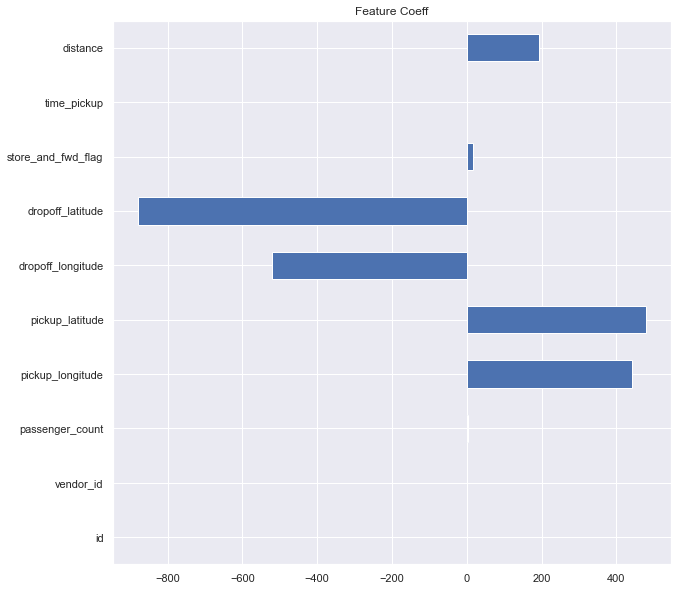

In [147]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.504
lr mse: 78622.149
lr rmse: 280.396


ridge train score: 0.504
ridge mse: 78622.153
ridge rmse: 280.396


lasso train score: 0.501
lasso mse: 79164.738
lasso rmse: 281.362


elasticnet train score: 0.482
elasticnet mse: 82075.095
elasticnet rmse: 286.488


In [153]:
submission.to_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/submission.csv', index=False)

<AxesSubplot:title={'center':'trip_duration'}, xlabel='trip_duration', ylabel='Density'>

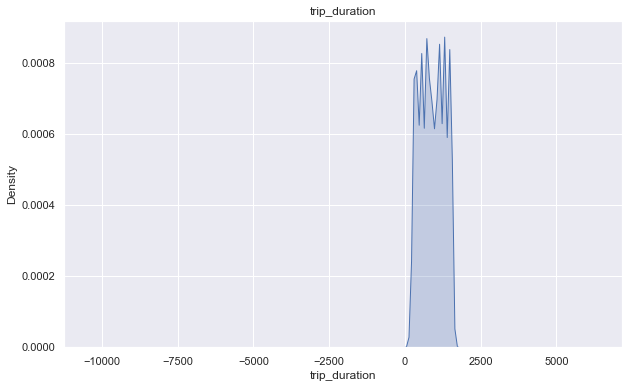

In [815]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("trip_duration")
sns.kdeplot(data=s_submission['trip_duration'], shade=True)

Second Solution Process: Classification
--

In [206]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,1,0,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,0,0,0,0,0,0,1,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,0,0,0,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,0,0,0,0,0,0,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,0,0,0,0,0,1,0,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,1,0,0,0,0,0,0,0,0,0


In [283]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,...,dc_5,dc_6,dc_7,dc_8,dc_9,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,2.74643,...,0,0,0,0,0,630235958,6,30,23,Thursday
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,2.75924,...,0,0,0,0,0,630235953,6,30,23,Thursday
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,1.30616,...,0,0,0,1,0,630235947,6,30,23,Thursday
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,5.26909,...,0,0,0,1,0,630235941,6,30,23,Thursday
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,0.96084,...,0,0,0,0,0,630235933,6,30,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,0.96744,...,0,0,0,1,0,101000252,1,1,0,Friday
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,6.19634,...,1,0,0,0,0,101000152,1,1,0,Friday
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,8.15372,...,0,0,0,0,0,101000124,1,1,0,Friday
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,20.38075,...,0,0,0,0,0,101000028,1,1,0,Friday
